### Using K - Means algorithm to model custmer Segmentation 
1. Using K - means algorithmic model to build cluster 
2. Choosing different k values (Heuristic values)
    - Elbow Method
    - Davies - Bouldin Index 
    - Silhoutte's Method 
3. Model Development with pre-defined no. of iterations 
4. Model Evaluations 

In [1]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### Information about the datasets 
1. Collection of lot of customer related information or observations with n features 
2. Task is segment customers based on likeable features, similar trades etc. 
3. K-Means clustering helps us to cluster and create k clusters for features 

In [2]:
#Data Collection 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv"
df = pd.read_csv(url)
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
5,6,40,1,23,81,0.998,7.831,NaN,NBA016,10.9
6,7,38,2,4,56,0.442,0.454,0.0,NBA013,1.6
7,8,42,3,0,64,0.279,3.945,0.0,NBA009,6.6
8,9,26,1,5,18,0.575,2.215,NaN,NBA006,15.5
9,10,47,3,23,115,0.653,3.947,0.0,NBA011,4.0


In [3]:
#Data Pre-processing
df.info()

#Count if any column have not-null value 
df.notnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


Customer Id        850
Age                850
Edu                850
Years Employed     850
Income             850
Card Debt          850
Other Debt         850
Defaulted          700
Address            850
DebtIncomeRatio    850
dtype: int64

In [4]:
#Address can be dropped and it's not dependent on the result 
sdf = df.drop(['Address'], axis= 1)

#Drop row's which have "NaN" values in Defaulted features 
sdf = sdf.dropna()
sdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


<Axes: >

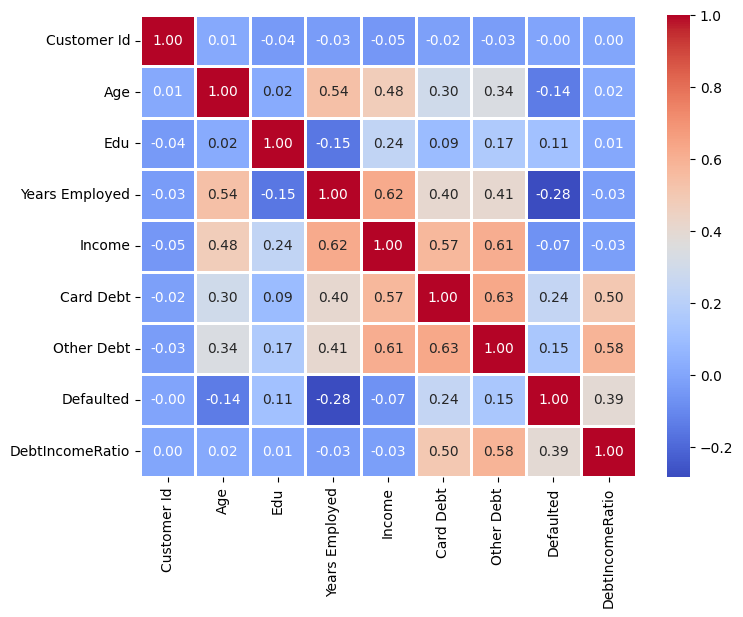

In [5]:
#Checking the correlation matrix with each features 
correlations = sdf.corr()

#Visualization of correleation with heatmap
plt.figure(figsize= (8, 6))
sns.heatmap(correlations, cmap= 'coolwarm', annot= True, fmt= '0.2f', linewidths= 0.8)

In [6]:
#Dataset Preprocessing (Using Standarization to make features comparable)
from sklearn.preprocessing import StandardScaler

stand_features = StandardScaler().fit_transform(sdf)

### How to select optimized value for K
- As k-Means algorithm is a iterative process, in each iteration clusters are modified with correct clustering
- Different method's to select optimized k value 
1. `Silhoutte's Method`
### Formula

For a data point (i):

* Let (a(i)) = average distance from (i) to all other points in its own cluster.
* Let (b(i)) = minimum average distance from (i) to points in another cluster (nearest cluster).

The silhouette score for point (i) is:

$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$

where:

* $( -1 \leq s(i) \leq 1 )$.

The **overall silhouette score** is the mean of (s(i)) over all points.

2. `Elbow Method`
### Formula

The total **within-cluster sum of squared errors (SSE or inertia)** is:

$
\text{SSE}(k) = \sum_{j=1}^{k} \sum_{x_i \in C_j} |x_i - \mu_j|^2
$

where:

* ($C_j$) = cluster (j).
* ($\mu_j$) = centroid of cluster (j).

3. `Davies-Bouldin Index`
### Formula

For each cluster (i):

* Compute **scatter** (S_i) (average distance of points to centroid):

$
S_i = \frac{1}{|C_i|} \sum_{x \in C_i} |x - \mu_i|
$

* For each pair of clusters (i, j), compute similarity:

$
R_{ij} = \frac{S_i + S_j}{d(\mu_i, \mu_j)}
$

where (d(\mu_i, \mu_j)) = distance between centroids.

* For each cluster (i), take the **worst similarity** (largest (R_{ij})):

$
R_i = \max_{j \neq i} R_{ij}
$

* The **Davies–Bouldin Index** is the average across clusters:

$
DBI = \frac{1}{k} \sum_{i=1}^{k} R_i
$

### ✅ Summary Table

| Method             | What It Measures                      | Math Criterion                    | Best (k) is…          |
| ------------------ | ------------------------------------- | --------------------------------- | --------------------- |
| **Silhouette**     | How well-separated clusters are       | Maximize average silhouette score | Where score peaks     |
| **Elbow**          | Variance explained vs. clusters added | Look at drop in SSE               | At the "elbow"        |
| **Davies–Bouldin** | Compactness + separation balance      | Minimize DBI                      | Where DBI is smallest |

In [7]:
#Select optimized value of k with each heuristic method 
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

sm_score = []
davies_score = []
elbow_score = []
k_values = range(2, 10) #check k_value from 2 -> 9

for k in k_values:

    #Model Prediction with standarized features 
    k_mean = KMeans(init= 'k-means++', n_clusters= k, n_init= 10)
    labels = k_mean.fit_predict(stand_features)

    #Calculate method of each k values 
    #Silhoutte's Method
    sm_score.append(silhouette_score(stand_features, labels))

    #Eblow Method 
    elbow_score.append(k_mean.inertia_)

    #Davies-Bouldin Index 
    davies_score.append(davies_bouldin_score(stand_features, labels))

print(f'Sillhoute Scores: {sm_score}')
print(f'Davies Bouldin Score: {davies_score}')
print(f'Elbow Score: {elbow_score}')

Sillhoute Scores: [0.30201873044004307, 0.22729937684925042, 0.20396735336740895, 0.15904551522195354, 0.1626114213212388, 0.16647637237452678, 0.16243187913653673, 0.17519898261870095]
Davies Bouldin Score: [1.6430697253150637, 1.5720365519852029, 1.5987284280172895, 1.608757058479927, 1.5719859346037826, 1.4841384698247648, 1.4877915175792036, 1.489211526303648]
Elbow Score: [4936.896196031848, 4224.016203244399, 3782.6521771859248, 3488.261542389801, 3218.130142752938, 2999.895850884056, 2824.82080808791, 2665.034934760546]


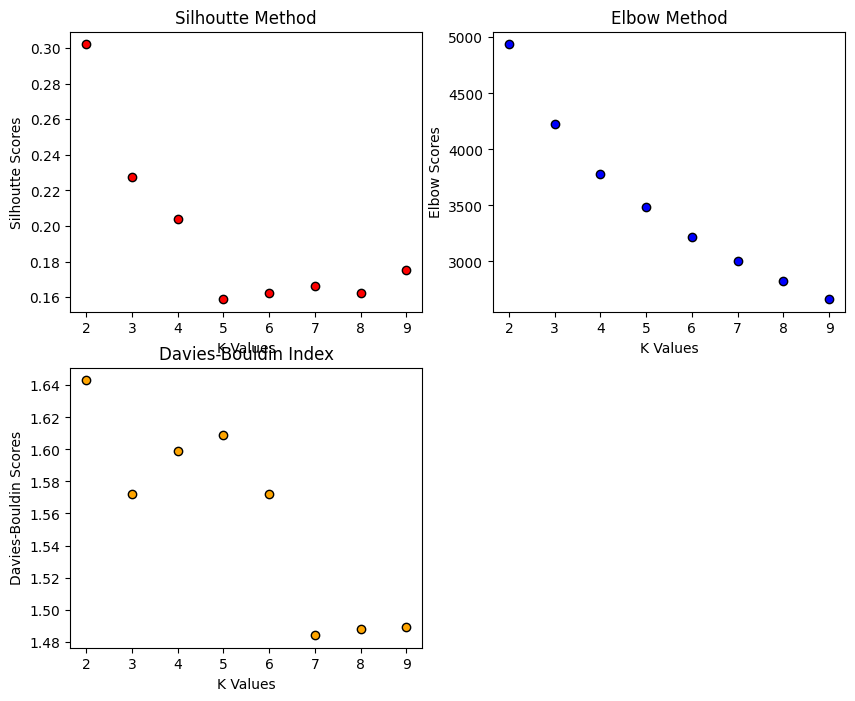

In [8]:
#Plot Visualization of different scores with k_values 
fig = plt.figure(figsize= (10, 8))

#Adding Subplot 2 in figure
fig1 = fig.add_subplot(2, 2, 1)

fig1.plot(k_values, sm_score, 'o', markerfacecolor= 'red', markeredgecolor= 'k')
fig1.set_title('Silhoutte Method')
fig1.set_xlabel('K Values')
fig1.set_ylabel('Silhoutte Scores')

#Adding Subplot 2 in figure
fig2 = fig.add_subplot(2, 2, 2)

fig2.plot(k_values, elbow_score, 'o', markerfacecolor= 'blue', markeredgecolor= 'k')
fig2.set_title('Elbow Method')
fig2.set_xlabel('K Values')
fig2.set_ylabel('Elbow Scores')

fig3 = fig.add_subplot(2, 2, 3)

fig3.plot(k_values, davies_score, 'o', markerfacecolor= 'orange', markeredgecolor= 'k')
fig3.set_title('Davies-Bouldin Index')
fig3.set_xlabel('K Values')
fig3.set_ylabel('Davies-Bouldin Scores')

plt.show()

In [9]:
#From the above graphs, if we take k = 3 we get the distributed clusters 
k = 3
k_mean = KMeans(init= 'k-means++', n_clusters= k, n_init= 12)

k_mean.fit(stand_features)

,n_clusters,3
,init,'k-means++'
,n_init,12
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [10]:
k_labels = k_mean.labels_
cluster_centroids = k_mean.cluster_centers_

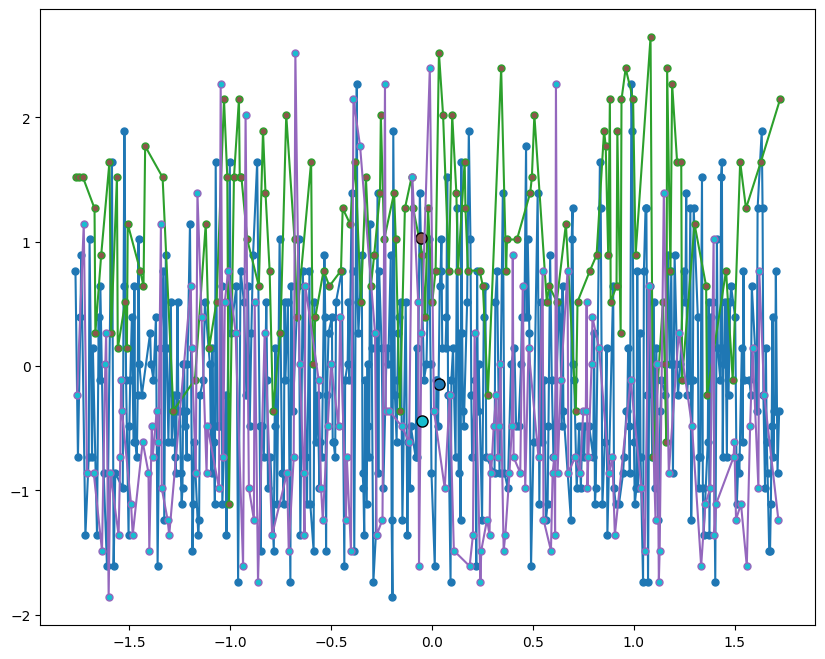

In [12]:
#Visualization of each clusters in this dataset 
fig = plt.figure(figsize= (10, 8))

#Different Clusters colors 
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_labels))))

ax = fig.add_subplot(1, 1, 1)
for k, col in zip(k_labels, colors):

    #bit masking to assign each datapoints to correct clusters 
    my_members = (k_labels == k)

    #Getting centroid value for each clusters 
    centroid = cluster_centroids[k]

    #Plotting data points of each clusters 
    ax.plot(stand_features[my_members, 0], stand_features[my_members, 1], markerfacecolor= col, marker= '.', ms= 10)

    #Plotting Centroid of clusters 
    ax.plot(centroid[0], centroid[1], 'o', markerfacecolor= col, markeredgecolor= 'k', markersize= 8)

plt.show()